## one image predict

In [1]:
import cv2
import numpy as np

select_os = "windows"

if select_os == "windows":
    CFG_PATH = "cfg_mask/yolov4-custom.cfg"
    WEIGHT_PATH = "cfg_mask/weights/yolov4-custom_8000.weights"
    NAME_PATH = "cfg_mask/obj.name"
    TEST_IMG_PATH = "dataset/train/img0001.png"
else:
    CFG_PATH = "/content/cfg_mask/yolov4-custom.cfg"
    WEIGHT_PATH = "/content/yolov4-custom_8000.weights"
    NAME_PATH = "/content/cfg_mask/obj.names"
    TEST_IMG_PATH = "/content/yolo/0001.png"
    
net = cv2.dnn.readNetFromDarknet(CFG_PATH,WEIGHT_PATH)
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
classes = [line.strip() for line in open(NAME_PATH)]
colors = [(0,0,255),(255,0,0),(0,255,0), (255, 255, 0)] # 設定不同class 的顏色

# 回傳預測後的圖片
def yolo_detect(frame):
    # forward propogation
    # img = cv2.resize(frame, None, fx=0.4, fy=0.4)
    img = frame
    # print(image.shape)
    height, width, channels = img.shape 
    blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # get detection boxes
    class_ids = []
    confidences = []
    boxes = []
    
    for out in outs:
        for detection in out:
            # print(detection)
            tx, ty, tw, th, confidence = detection[0:5]
            scores = detection[5:]
            # print(detection[5:])
            class_id = np.argmax(scores)
            # print(class_id)
            if confidence > 0.3:   
                center_x = int(tx * width)
                center_y = int(ty * height)
                w = int(tw * width)
                h = int(th * height)

                # 取得箱子方框座標
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                # if x < 0:
                #     x = 0
                # if y < 0:
                #     y = 0                
                boxes.append([x, y, w, h])
                print(x, y, w, h)
                confidences.append(float(confidence))
                class_ids.append(class_id)
                
    # for i in range(len(boxes)):
    #     print(class_ids[i], boxes, sep=' ')
    # print(len(class_ids))
    # print(len(boxes))
    # draw boxes
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.3, 0.4)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            # print(i)
            x, y, w, h = boxes[i]
            # print(class_ids[i])
            label = str(classes[class_ids[i]])
            # print(label)
            # print(class_ids[i])
            # print("=================")
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y -5), font, 3, color, 3)
    return img

1685 0 66 35
1684 -1 68 36
1684 4 67 38
1684 4 67 37
1682 34 62 35
1681 33 65 38
1680 64 65 32
1812 51 31 41
1681 69 65 34
1681 68 66 35
1230 142 23 30
1270 143 24 30
1286 142 20 29
407 161 29 28
440 159 25 29
587 158 28 28
627 158 30 28
1808 181 38 77
1808 181 38 77
655 254 40 63
817 256 30 58
850 253 31 62
952 254 30 58
986 257 35 56
448 265 33 69
448 265 34 70
516 268 33 66
515 267 35 68
548 268 33 64
547 267 35 66
654 264 37 65
654 264 38 66
715 271 31 58
749 272 29 58
749 270 32 62
781 267 31 61
780 265 34 65
817 263 30 63
850 262 31 66
883 268 30 62
882 267 32 64
918 271 27 59
918 270 30 63
951 265 30 60
985 265 39 58
586 337 30 63
619 337 31 63
656 339 34 58
700 339 44 59
786 336 30 64
951 334 33 61
950 334 35 62
987 338 32 56
1023 334 36 66
1022 333 38 68
1057 330 31 69
1056 329 33 72
450 349 34 67
449 349 35 68
487 349 32 68
486 348 33 69
521 349 33 67
521 348 34 69
554 347 31 66
554 347 32 68
585 346 29 65
584 347 31 66
619 346 31 67
619 346 32 68
657 349 36 62
655 347 39 66


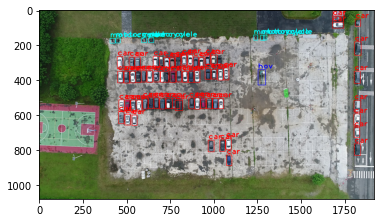

In [2]:
from PIL import Image
from matplotlib import pyplot as plt

img = cv2.imread(TEST_IMG_PATH)
# print(img.shape)
Image.open(TEST_IMG_PATH)
im = yolo_detect(img)
img_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
cv2.imshow('My Image', img_bgr)
# 按下任意鍵則關閉所有視窗
cv2.waitKey(0)
cv2.destroyAllWindows()